# Data Science Project: Predicting Usage of a Video Game Research Server (Individual Planning Stage)

## Data Description

### `players.csv`
**Dataset Overview**
- The `players.csv` dataset contains 196 observations and 7 variables, each representing unique player characteristics such as age, country, playtime, and newsletter subscription status.
- The mean value of `played_hours` is 5.85 hours, and the mean value of `Age` is 21.14 years in the `players.csv` dataset.

**Variables**
- The player’s self-reported experience level: `experience`
- Whether the player subscribed to the game-related newsletter: `subscribe`
- Unique, anonymized player identifier: `hashedEmail`
- Total number of hours the player has spent in the game: `played_hours`
- Player’s chosen display name: `name`
- Gender of the player (if provided): `gender`
- Age of the player in years: `Age`

### `sessions.csv`
**Dataset Overview**
- The `sessions.csv` dataset includes 1535 observations and 5 variables, each representing an individual game session, including duration, start time, and in-game actions.

**Variables**
- Unique, anonymized player identifier: `hashedEmail`
- Timestamp when the recorded session began: `start_time`
- Timestamp when the session ended: `end_time`
- The original session start time: `original_start_time`
- The original session end time: `original_end_time`

### Data Quality Issues
- Some players appear with very short or zero `played_hours`.
- The `name` variable may include duplicates usernames or inconsistent capitalization.
- There are some missing values for `Age`.
- Potential duplicates in `hashedEmail`.
- `start_time` and `end_time` might include time zone inconsistencies or overlapping sessions for the same user.

### Data Collection Method
The data was collected from a research group in Computer Science at UBC, led by Frank Wood. As players engaged with the Minecraft server they set up, the server continuously logged their actions, session times, and account information (such as playtime, experience level, and subscription status).

## Project Question

**Broad Question**
<br> Which types of players are most likely to contribute a large amount of gameplay data to the UBC Minecraft research server?

**Specific Question**
<br> Can player characteristics such as experience level, age, and gender predict the total number of hours played in the `players.csv` dataset?

- **Response variable** is `played_hours`
- **Explanatory variables** are `experience`, `Age`, and `gender`.

Players who are more experienced or within certain demographic groups may spend more time in the game and thus generate more data.
<br> Identifying these players can help the research team focus recruitment on participants who are likely to contribute, which can improve both data quality and project efficiency. 

The `players.csv dataset` contains demographic and engagement information. After organizing the data, I will apply a predictive model to determine which player characteristics best explain total hours played and thus total data contribution.

## Exploratory Data Analysis and Visualization

**Loading and Inspecting the Data**

In [2]:
# Run this first.
library(tidyverse)

players <- read_csv("players.csv") 
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

**Mean of Quantitative Variables**

In [3]:
players |>
    summarize(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2)))

played_hours,Age
<dbl>,<dbl>
5.85,21.14


**Result**
<br> `played_hours`: 5.85 
<br> `Age`: 21.14

**Basic Wrangling**

In [5]:
players_tidy <- players |>
    select(experience, gender, Age, played_hours)

**Exploratory Visualizations**

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


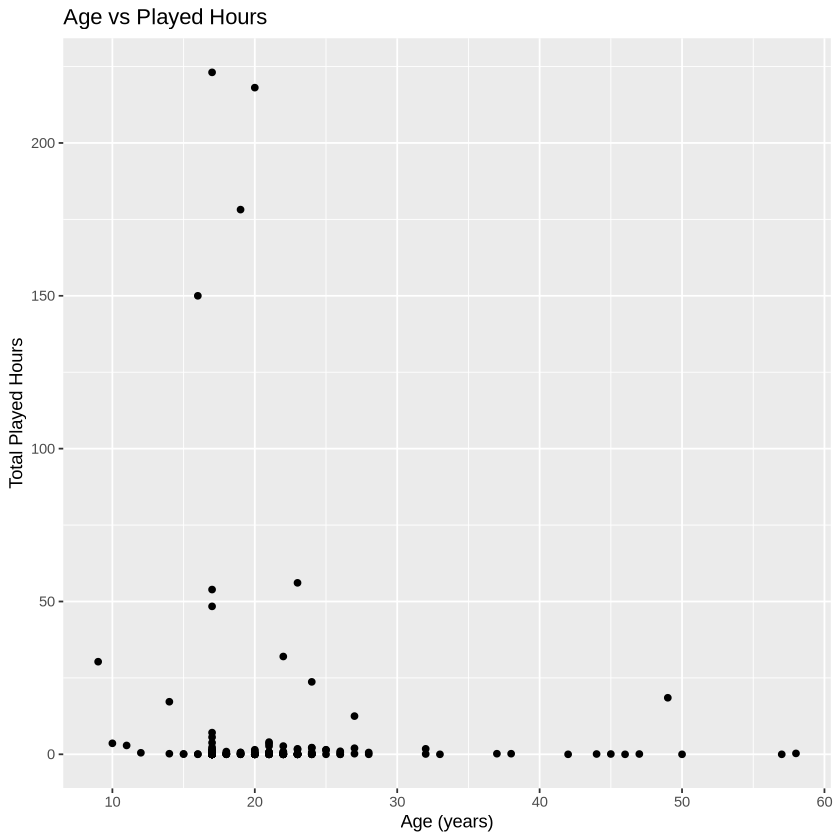

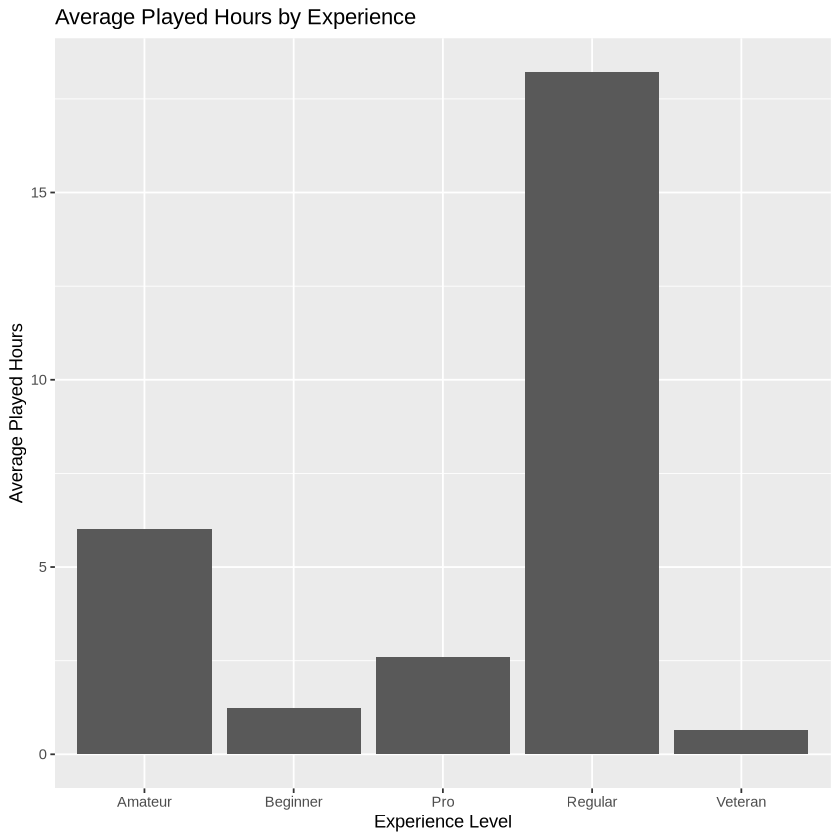

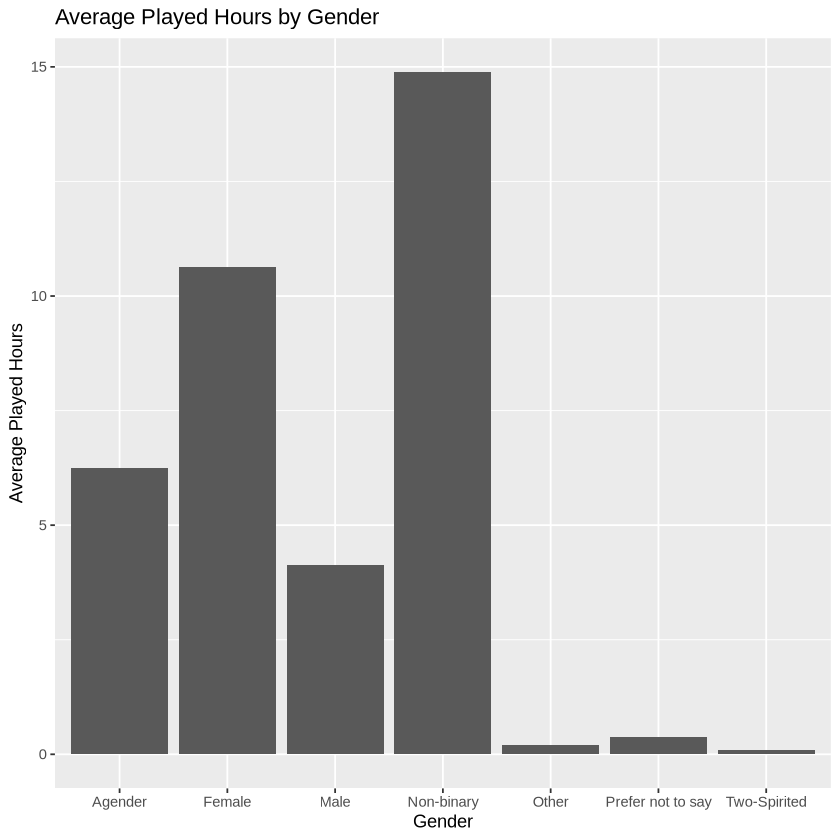

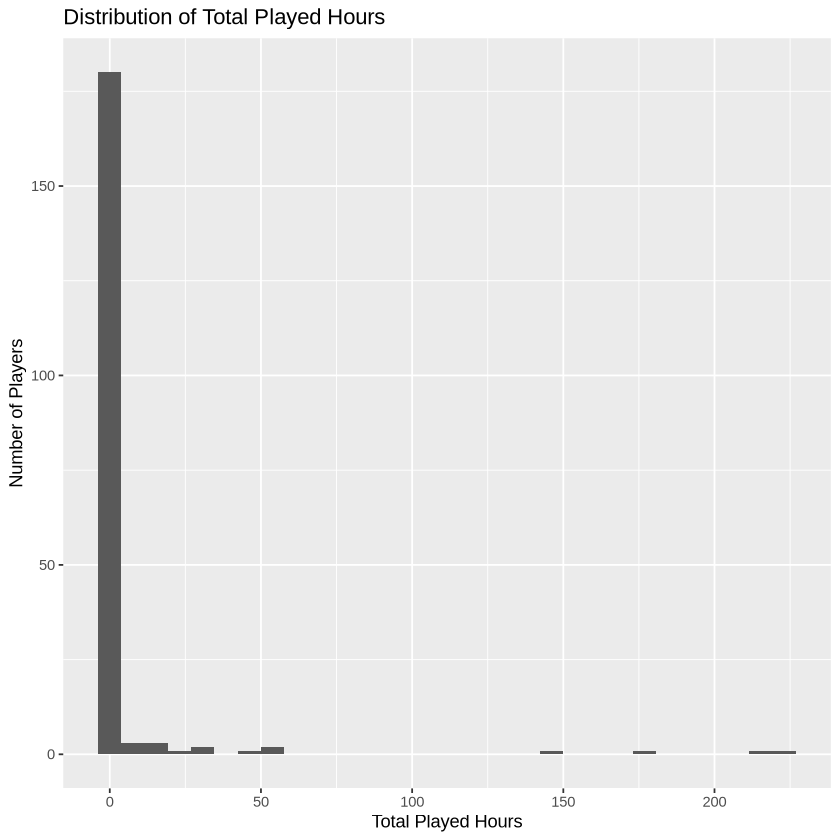

In [6]:
# Age vs Played Hours
ggplot(players, aes(x = Age, y = played_hours)) +
    geom_point() +
    labs(title = "Age vs Played Hours",
         x = "Age (years)",
         y = "Total Played Hours")

# Experience vs Played Hours
ggplot(players, aes(x = as.factor(experience), y = played_hours)) +
    geom_bar(stat = "summary", fun = "mean") +
    labs(title = "Average Played Hours by Experience",
         x = "Experience Level",
         y = "Average Played Hours")

# Gender vs Played Hours
ggplot(players, aes(x = gender, y = played_hours)) +
    geom_bar(stat = "summary", fun = "mean") +
    labs(title = "Average Played Hours by Gender",
         x = "Gender",
         y = "Average Played Hours")

# Distribution of Played Hours (histogram)
ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribution of Total Played Hours",
       x = "Total Played Hours",
       y = "Number of Players")

**Insights**
- Players aged between their mid-teens and late 20s showed the highest total playtime.
- Players with the experience level “regular” contributed the most overall; in general, higher experience levels correspond to greater total playtime.
- These results suggest that experience and age are key factors for predicting which players contribute the most data in future analyses.
- Most players spend fewer than 10 hours in total, while a small number of highly active players contribute significantly more.

## Methods and Plan

To examine how player characteristics (`experience`, `Age`, `gender`) influence total playtime (`played_hours`), I will use a **linear regression** model.

**Why this Method is Appropriate**
- The response variable, `played_hours`, represents a continuous numeric value (total hours of gameplay), and linear regression is suitable because it predicts continuous outcomes.
- It allows inclusion of multiple explanatory variables at once to understand their combined effect on playtime.

**Assumptions**
<br> Linearity – The relationship between predictors and playtime is linear.
<br> Normality – The residuals follow a normal distribution.

**Potential Limitations**
- Nonlinear relationships may reduce accuracy.
- Outliers (ex. players with extremely high hours) could distort the model.
- Missing demographic data may bias the results.

**Model Comparison and Selection**
- Model performance will be assessed using R² and RMSE.
- I will start with a simple model (with only one explanatory variable) and then add more variables to see if they improve the prediction of `played_hours`. If adding variables increases accuracy, I will keep them; if not, I will use the simpler model.
- Cross-validation will be used to check model stability.

**Data Processing Plan**
1. Prepare data - Handle missing values, organize categorical variables, and check for outliers.
2. Split data - Randomly divide into training and testing sets.
3. Fit the model - Use training data to build the regression model.
4. Validate - Evaluate performance on the test data using R² and RMSE.
5. Cross-validate - Apply 5-fold cross-validation to ensure the model generalizes well.